In [1]:
# Import des packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, chi2

In [2]:
# Import du dataframe
df = pd.read_csv("data/lenses.txt", sep="\t")

In [3]:
# Première visualisation du dataframe
df.head()

,Age,Prescription,Astigmatic,Tears,Recommendation
0,young,myope,no,reduced,none
1,young,myope,no,normal,soft
2,young,myope,yes,reduced,none
3,young,myope,yes,normal,hard
4,young,hypermetrope,no,reduced,none


In [4]:
df.describe()

,Age,Prescription,Astigmatic,Tears,Recommendation
count,24,24,24,24,24
unique,3,2,2,2,3
top,young,myope,no,reduced,none
freq,8,12,12,12,15


In [5]:
# Réalisation de la matrice de contingence pour les effectifs
M_cont = pd.crosstab(df['Age'], df['Recommendation'], margins = True)
M_cont

Recommendation,hard,none,soft,All
Age,,,,
pre-presbyopic,1,5,2,8
presbyopic,1,6,1,8
young,2,4,2,8
All,4,15,5,24


In [6]:
# Réalisation de la matrice de contingence pour les fréquences
M_cont_eff = M_cont/M_cont.loc['All', 'All']
M_cont_eff

Recommendation,hard,none,soft,All
Age,,,,
pre-presbyopic,0.041667,0.208333,0.083333,0.333333
presbyopic,0.041667,0.250000,0.041667,0.333333
young,0.083333,0.166667,0.083333,0.333333
All,0.166667,0.625000,0.208333,1.000000


In [7]:
M_cont_sstt = pd.crosstab(df['Age'], df['Recommendation'], margins = False)

# Réalisation du tableau de fréquence par ligne...
tableau_frequences_ligne = M_cont_sstt.div(M_cont_sstt.sum(axis=1), axis=0)
tableau_frequences_ligne


Recommendation,hard,none,soft
Age,,,
pre-presbyopic,0.125,0.625,0.250
presbyopic,0.125,0.750,0.125
young,0.250,0.500,0.250


In [8]:
# ... Et par colonne
tableau_frequences_colonne = M_cont_sstt.div(M_cont_sstt.sum(axis=0), axis=1)
tableau_frequences_colonne

Recommendation,hard,none,soft
Age,,,
pre-presbyopic,0.25,0.333333,0.4
presbyopic,0.25,0.400000,0.2
young,0.50,0.266667,0.4


In [9]:
# Vérifions que les sommes des lignes soient égale à 1 : 
print(tableau_frequences_colonne.sum())
tableau_frequences_ligne.transpose().sum()

Recommendation
hard    1.0
none    1.0
soft    1.0
dtype: float64


Age
pre-presbyopic    1.0
presbyopic        1.0
young             1.0
dtype: float64

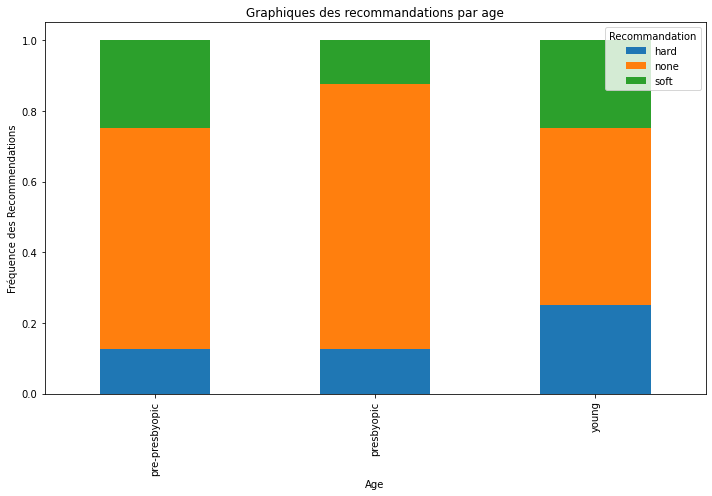

In [10]:
index = ['pre-presbyopic', 'presbyopic', 'young']

tableau_frequences_ligne.plot(kind='bar', figsize=(10,7), stacked= True)

plt.title('Graphiques des recommandations par age')
plt.ylabel('Fréquence des Recommendations')
plt.xlabel('Age')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='Recommandation')

plt.show()

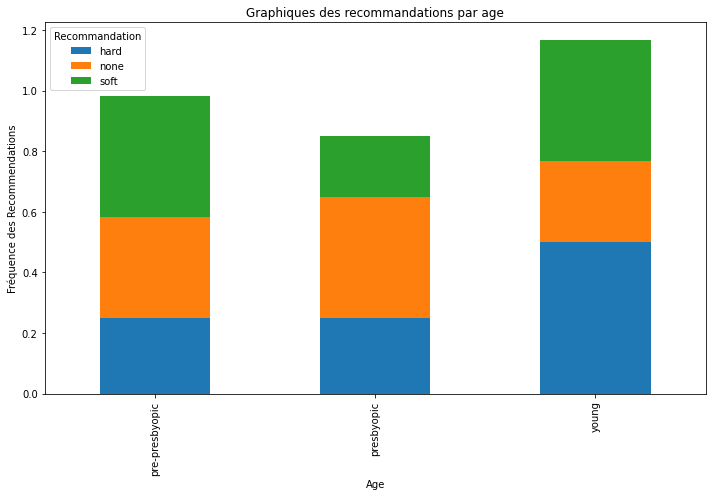

In [11]:
index = ['pre-presbyopic', 'presbyopic', 'young']

tableau_frequences_colonne.plot(kind='bar', figsize=(10,7), stacked= True)

plt.title('Graphiques des recommandations par age')
plt.ylabel('Fréquence des Recommendations')
plt.xlabel('Age')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='Recommandation')

plt.show()

In [12]:
# Réalisation du tableau de fréquences théorique : 
M_freq_theo = pd.DataFrame(index=M_cont.index, columns=M_cont.columns)
for i in M_cont.index:
    for j in M_cont.columns:
        M_freq_theo.at[i, j] = (M_cont.loc[i].sum() * M_cont[j].sum()) / M_cont.loc['All', 'All']/100

print(M_freq_theo)
M_cont_eff

Recommendation      hard none      soft   All
Age                                          
pre-presbyopic  0.053333  0.2  0.066667  0.32
presbyopic      0.053333  0.2  0.066667  0.32
young           0.053333  0.2  0.066667  0.32
All                 0.16  0.6       0.2  0.96


Recommendation,hard,none,soft,All
Age,,,,
pre-presbyopic,0.041667,0.208333,0.083333,0.333333
presbyopic,0.041667,0.250000,0.041667,0.333333
young,0.083333,0.166667,0.083333,0.333333
All,0.166667,0.625000,0.208333,1.000000


In [13]:
# Réalisation du tableau de valeurs théorique :
row_total = M_cont.sum(axis=1)
col_total = M_cont.sum(axis=0)
total = M_cont.values.sum()

M_val_theo = pd.DataFrame(
    data={
        col: [row_total * col_total[col] / total for row_total in row_total]
        for col in M_cont.columns
    },
    index=M_cont.index
)

print(M_val_theo)
M_cont

                    hard  none      soft   All
Age                                           
pre-presbyopic  1.333333   5.0  1.666667   8.0
presbyopic      1.333333   5.0  1.666667   8.0
young           1.333333   5.0  1.666667   8.0
All             4.000000  15.0  5.000000  24.0


Recommendation,hard,none,soft,All
Age,,,,
pre-presbyopic,1,5,2,8
presbyopic,1,6,1,8
young,2,4,2,8
All,4,15,5,24


On voit que tant pour les valeurs que pour les fréquences, le tableau prédit est proche du tableau de contingence. Cela montre une non correlations entres les variables. Afin d'en être sûr, nous allons réaliser le calcul du chi-2.

In [14]:
# Calcul du test chi-2
chi_2, p, deg2lib, tab_freq = chi2_contingency(M_cont)

print(f"la valeur du chi_2 : {chi_2}")
print(f"la p-valeur : {p}")
print(f"le degrée de liberté : {deg2lib}")
print("\nTableau des fréquences attendues :")
print(tab_freq)

la valeur du chi_2 : 1.3
la p-valeur : 0.998376448363871
le degrée de liberté : 9

Tableau des fréquences attendues :
[[ 1.33333333  5.          1.66666667  8.        ]
 [ 1.33333333  5.          1.66666667  8.        ]
 [ 1.33333333  5.          1.66666667  8.        ]
 [ 4.         15.          5.         24.        ]]


In [17]:
# Calcule du chi-2 à la main
chi2_final = ((M_cont_eff - tab_freq)**2 / tab_freq).sum()
deg2liberte = (M_cont_eff.shape[0] - 1) * (tab_freq.shape[1] - 1)
p_value = 1 - chi2.cdf(chi2_final, deg2liberte)

print(f"Valeur du chi2 : {chi2_final}")
print(f"p-valeur : {p_value}")

Valeur du chi2 : Recommendation
hard     7.348090
none    27.552778
soft     9.184722
All     44.083333
dtype: float64
p-valeur : [6.00927279e-01 1.13252949e-03 4.20400533e-01 1.36239165e-06]
